**Parth Parth**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 3a: Linear Regression

## Task 1. Mystery Data 1

### 1a) Import the data

1. Import data 'data/mystery_data_1.csv' (using your data class or [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html))
2. Print first 10 lines rows of data.

#### 1b) Using the following links and MatPlotLib documentation to view the data:
- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib hist](https://matplotlib.org/gallery/statistics/hist.html)
1. Create a figure with 3 subplots
    1. One scatterplot with column X on the x-axis and column Y on the y-axis.
    1. Two historgrams one for the X data and the other for the Y data.
    2. Create the histograms with 10 bins.
    3. Include a title for each subplot.

/tmp/ipykernel_547/2985231194.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid']);
/tmp/ipykernel_547/2985231194.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid']);


[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]

-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------



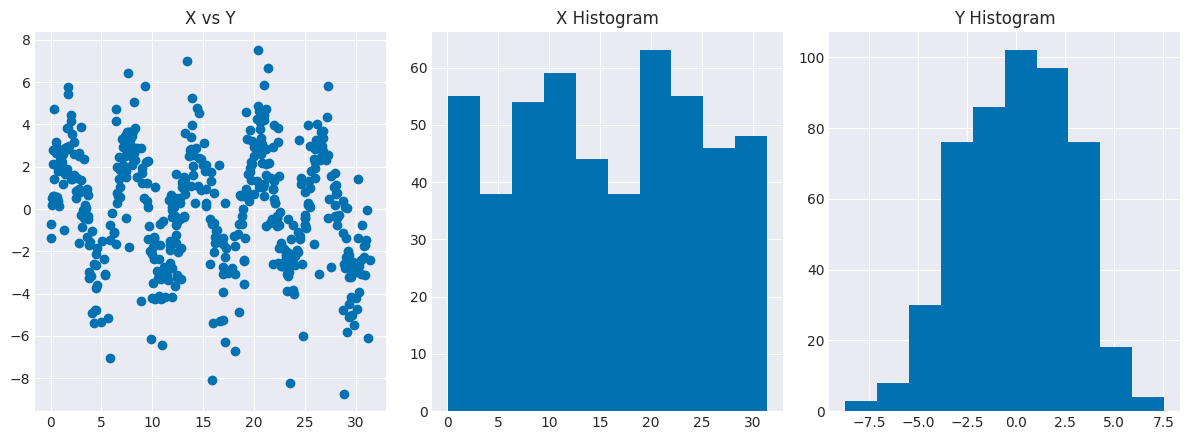

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import data
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid']);
plt.rcParams["figure.figsize"] = [12,4.5]

data_obj = data.Data('./data/mystery_data_1.csv')

# Print the first 10 rows of the data
print(data_obj.select_data(data_obj.get_headers(), range(10)))

print('''
-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------
''')


# Create 3 subplots
fig, ax = plt.subplots(1, 3)

ax[0].scatter(data_obj.select_data('X'), data_obj.select_data('Y'))
ax[1].hist(data_obj.select_data('X'), bins=10)
ax[2].hist(data_obj.select_data('Y'), bins=10)

# Set the title of each subplot
ax[0].set_title('X vs Y')
ax[1].set_title('X Histogram')
ax[2].set_title('Y Histogram')

# Padding
plt.tight_layout();

## Task 2. Analyze Mystery Data 1

### 2a) Use scipy to calculate the linear regression for Mystery Data 1 

1. Print first 10 lines rows of data.
2. Calculate the linear regression [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)
    1. The x column is the left hand side array and the y column is the right hand side array.
    2. This includes adding homogeneous coordinates (for the intercept) to the A matrix. 
    3. Useful methods: [hstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html), [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) and [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)
3. Print the least-squares solution and residues
4. Using the residual, calculate and print the $R^2$ value
    1. $R^2 = 1 - \frac{residues}{smd}$
    2. The square mean deviation: $smd = \sum (y - \frac{\sum y}{n} )^2$

In [28]:
import scipy.linalg

x = data_obj.select_data(['X'])

A = np.copy(x)
y = data_obj.select_data(['Y'])

Ahat = np.hstack([np.ones((A.shape[0], 1)), A])

# Calculate the linear regression coefficients
c = scipy.linalg.lstsq(Ahat, y)

# Print the least squares coefficients and the residues
print('c:', c[0].flatten())
print('residues:', c[1][0])

# Calculate the r^2 value
smd = np.sum((data_obj.select_data(['Y']) - np.mean(data_obj.select_data(['Y'])))**2)
r2 = 1 - c[1][0] / smd

print('r2:', r2)


print('''
-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

residues: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------
''')

c: [ 0.92884793 -0.05650709]
residues: 3722.8001542015754
r2: 0.033824411486558126

-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

residues: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------



### 2b) Visualize linear regression results with matplotlib

1. Plot a scatterplot of the mystery data X on the x axis and Y on the y axis
2. Plot a line representing the linear regression
    1. For line_x, use [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create 100 points from the min x value to the max x value
    2. For line_y, multiply line_x by the slope and add the intercept
3. Include a title (with $R^2$ value), legend, x label and y label

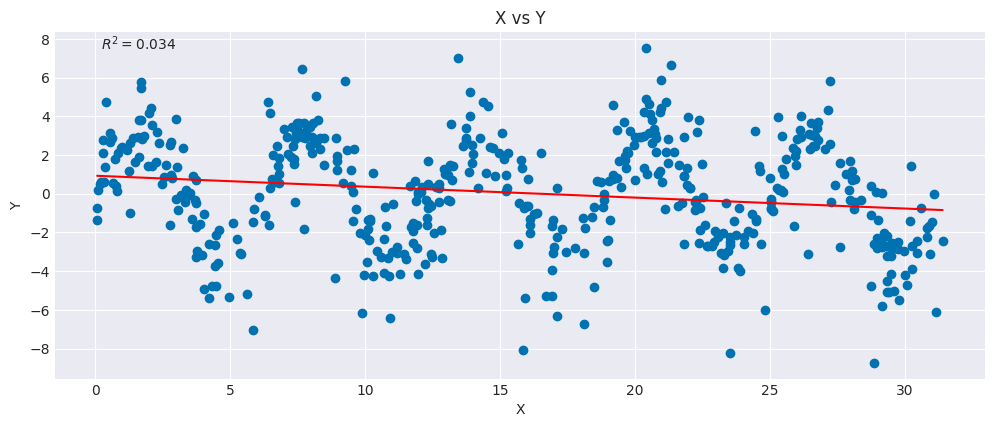

In [29]:
# Plot the data
plt.scatter(x, y)

# Plot the regression line
line_x = np.linspace(np.min(x), np.max(x), 100)
line_y = line_x * c[0][1] + c[0][0]

plt.plot(line_x, line_y, color='red')

# Add R^2
plt.text(0.05, 0.95, '$R^2 = {:.3f}$'.format(r2), transform=plt.gca().transAxes)

plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y');

### 2c)  Interpret the results of the linear regression of the dataset 

Interpret the results based on your plot and $R^2$ value. Is the linear regression model a good model for the data? Why?